In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('Iris.csv')
# df2 = sns.load_dataset('iris')

In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
# List down the features and their types (e.g., numeric, nominal) available in the dataset.

df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [16]:
df1 = df.drop(['Id', 'Species'], axis=1)

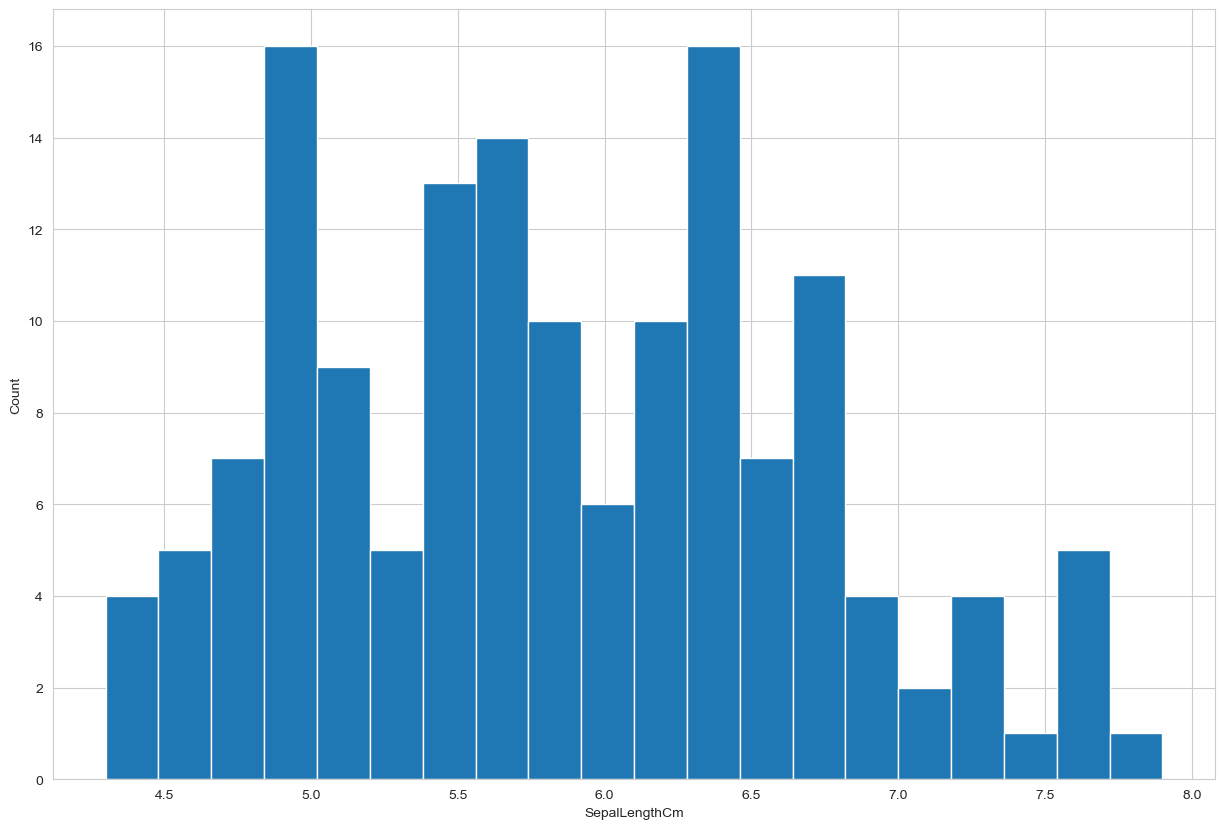

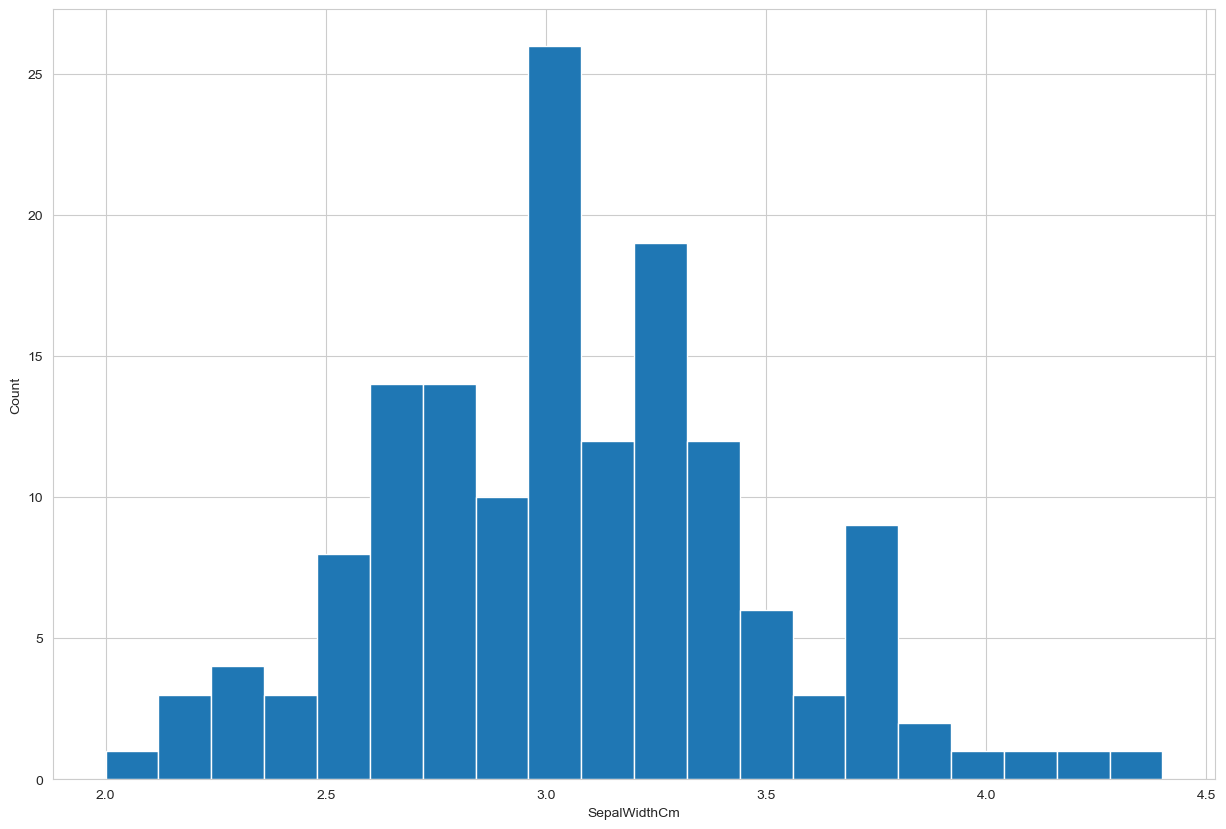

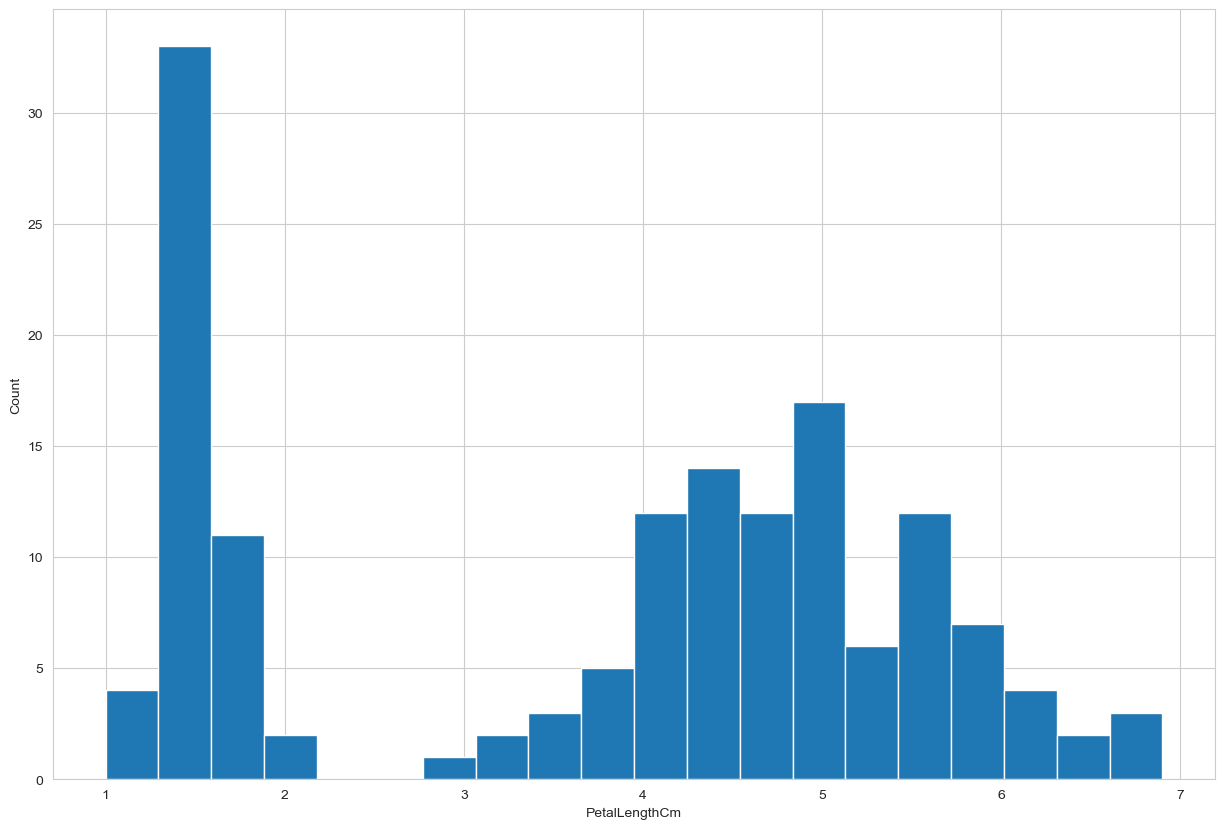

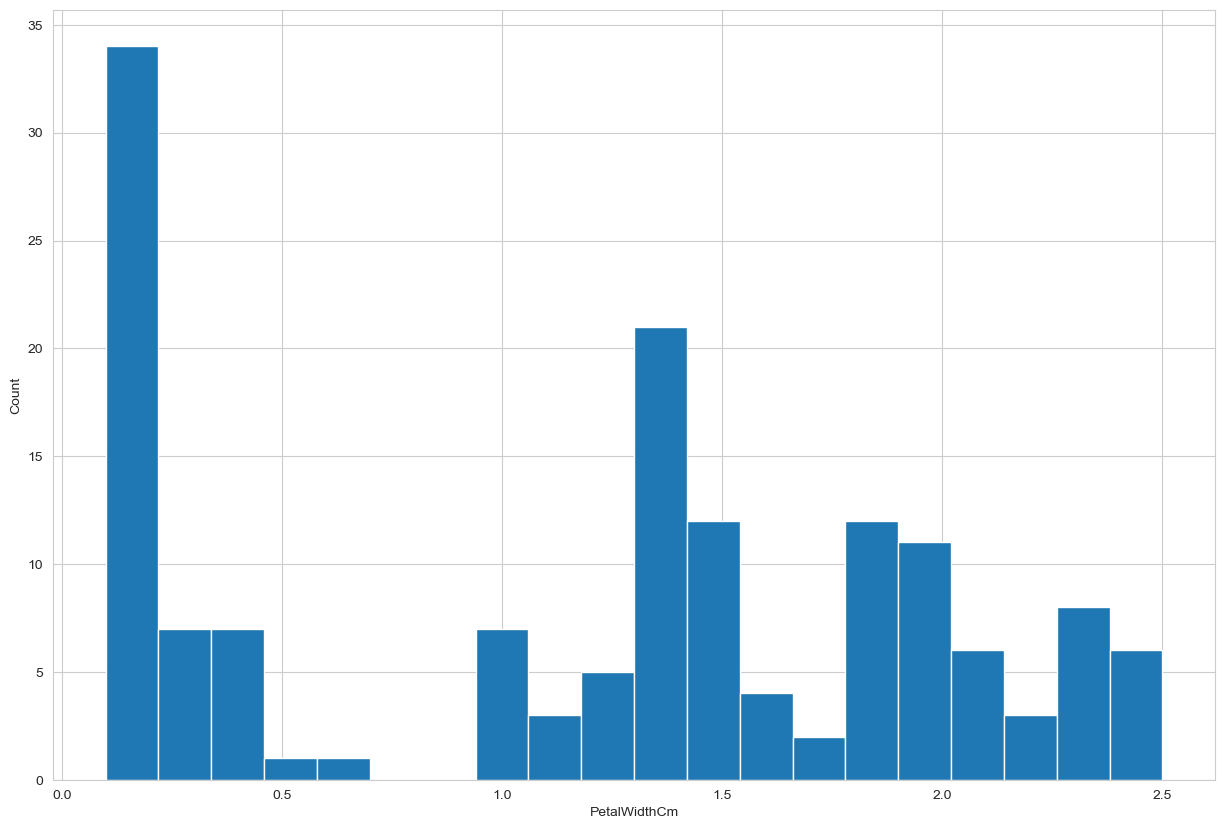

In [17]:
# Create a histogram for each feature in the dataset to illustrate the feature distributions.

def createHistogram(columnName, df):
    sns.set_style("whitegrid")
    plt.hist(df[columnName], bins=20)
    plt.xlabel(columnName)
    plt.ylabel('Count')

for col in df1:
    fig, axes = plt.subplots(1,1, figsize=(15,10))
    createHistogram(col, df1)


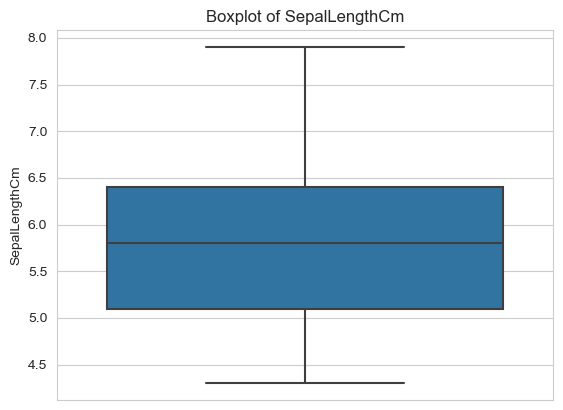

0


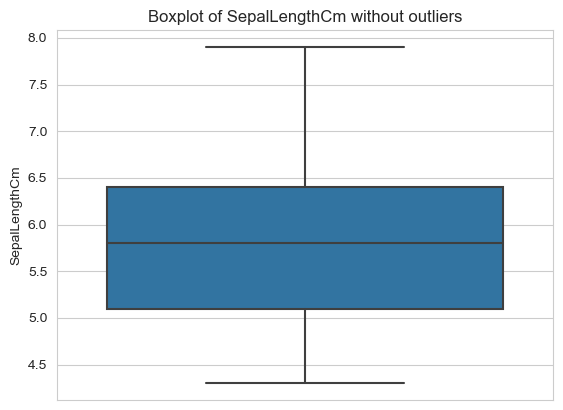

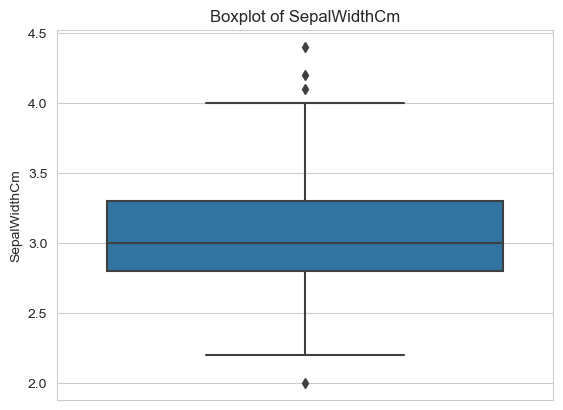

4


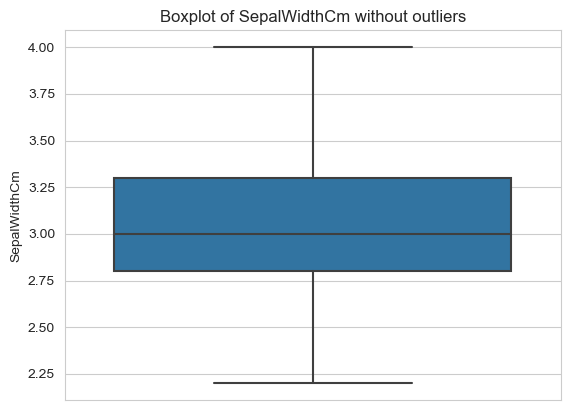

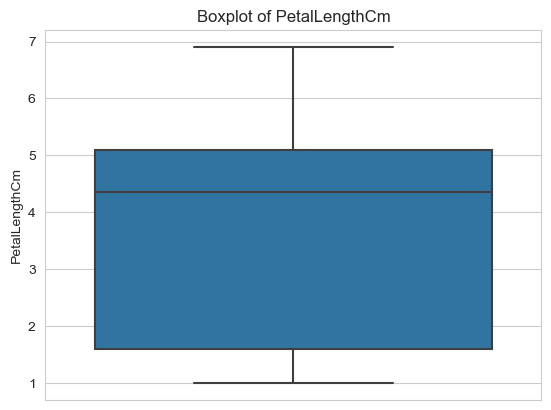

0


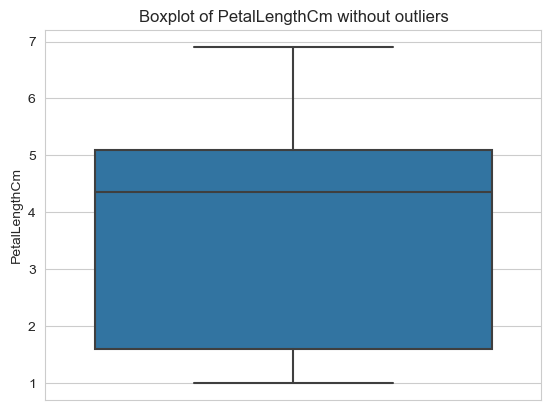

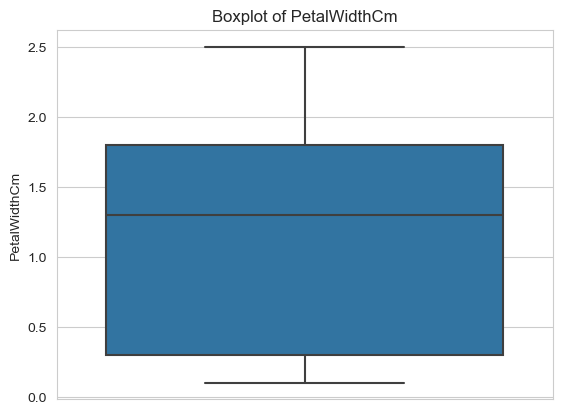

0


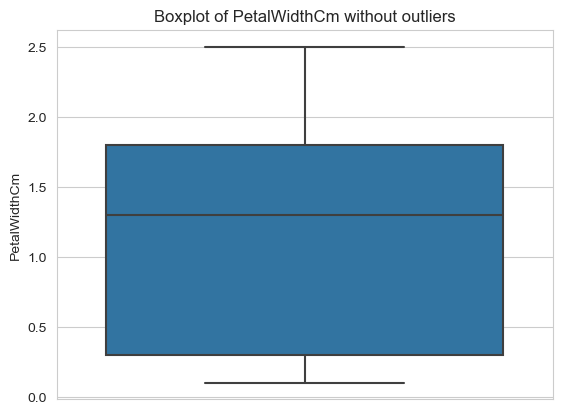

In [18]:
# Create a box plot for each feature in the dataset. Compare distributions and identify outliers.

def createBoxPlot(columnName, df):
    # plt.figure(figsize=(6,8))
    sns.boxplot(y=df[columnName])
    plt.ylabel(columnName)
    plt.title('Boxplot of '+ columnName)
    plt.show()

    # Calculate IQR
    Q1 = df[columnName].quantile(0.25)
    Q3 = df[columnName].quantile(0.75)
    IQR = Q3 - Q1

    # Define limits to identify outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Count the number of outliers
    outliers = df[(df[columnName] < lower_limit) | (df[columnName] > upper_limit)]
    num_outliers = len(outliers)
    print(num_outliers)

    # Remove outliers
    df = df[(df[columnName] >= lower_limit) & (df[columnName] <= upper_limit)]

    # Create a boxplot again without outliers
    # plt.figure(figsize=(6, 8))
    sns.boxplot(y=df[columnName])
    plt.ylabel(columnName)
    plt.title('Boxplot of ' + columnName + ' without outliers')
    plt.show()


for col in df1:
    createBoxPlot(col, df1)